In [2]:
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

import numpy as np
from mpl_toolkits import mplot3d
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as optimize

from consav import linear_interp

import Bargaining as brg

# plot style
linestyles = ['-','--','-.',':',':']
markers = ['o','s','D','*','P']
linewidth = 2
font_size = 17
font = {'size':font_size}
matplotlib.rc('font', **font)

plt.rcParams.update({'figure.max_open_warning': 0,'text.usetex': False})
path = 'output/'

# c++ settings
do_cpp = True
do_compile = True
threads = 16

In [3]:
# compile c++ files
if do_cpp & do_compile:
    model = brg.HouseholdModelClass(par={'do_cpp':do_cpp,'num_Ctot':100})
    model.link_to_cpp(force_compile=do_compile)

# Solve and simulate from alternative models

In [113]:
# settings for models to solve
T = 10
sigma = 0.1
num_love = 41

specs = {
    'model 1':{'latexname':'update power', 'par':{'div_A_share': 0.3, 'sigma_love':sigma,'T':T,'do_cpp':do_cpp,'threads':threads, 'interp_power':False,'num_love': num_love}},
    'model 2':{'latexname':'interp power', 'par':{'div_A_share': 0.3, 'sigma_love':sigma,'T':T,'do_cpp':do_cpp,'threads':threads, 'interp_power':True,'num_love': num_love}},
}


In [114]:
# solve different models
models = {}
for name,spec in specs.items():
    print(f'solving {name}...')
    
    # setup model
    models[name] = brg.HouseholdModelClass(name=name,par=spec['par'])
    if do_cpp: models[name].link_to_cpp(force_compile=False)
    models[name].spec = spec
    
    # solve
    models[name].solve()

solving model 1...
solving model 2...


In [115]:
m = models['model 1']

In [116]:
for t in range(m.par.T):
    for iL in range(m.par.num_love):
        for iA in range(m.par.num_A):
            if m.sol.power[t,0,iL,iA] -1.0 and m.sol.power[t,-1,iL,iA] == -1.0:
                print(t,0,iL,iA)

0 0 0 0
0 0 0 1
0 0 0 2
0 0 0 3
0 0 0 4
0 0 0 5
0 0 0 6
0 0 0 7
0 0 0 8
0 0 0 9
0 0 0 10
0 0 0 11
0 0 0 12
0 0 0 13
0 0 0 14
0 0 0 15
0 0 0 16
0 0 0 17
0 0 0 18
0 0 0 19
0 0 0 20
0 0 0 21
0 0 0 22
0 0 0 23
0 0 0 24
0 0 0 25
0 0 0 26
0 0 0 27
0 0 0 28
0 0 0 29
0 0 0 30
0 0 0 31
0 0 0 32
0 0 0 33
0 0 0 34
0 0 0 35
0 0 0 36
0 0 0 37
0 0 0 38
0 0 0 39
0 0 0 40
0 0 0 41
0 0 0 42
0 0 0 43
0 0 0 44
0 0 0 45
0 0 0 46
0 0 0 47
0 0 0 48
0 0 0 49
0 0 1 0
0 0 1 1
0 0 1 2
0 0 1 3
0 0 1 4
0 0 1 5
0 0 1 6
0 0 1 7
0 0 1 8
0 0 1 9
0 0 1 10
0 0 1 11
0 0 1 12
0 0 1 13
0 0 1 14
0 0 1 15
0 0 1 16
0 0 1 17
0 0 1 18
0 0 1 19
0 0 1 20
0 0 1 21
0 0 1 22
0 0 1 23
0 0 1 24
0 0 1 25
0 0 1 26
0 0 1 27
0 0 1 28
0 0 1 29
0 0 1 30
0 0 1 31
0 0 1 32
0 0 1 33
0 0 1 34
0 0 1 35
0 0 1 36
0 0 1 37
0 0 1 38
0 0 1 39
0 0 1 40
0 0 1 41
0 0 1 42
0 0 1 43
0 0 1 44
0 0 1 45
0 0 1 46
0 0 1 47
0 0 1 48
0 0 1 49
0 0 2 0
0 0 2 1
0 0 2 2
0 0 2 3
0 0 2 4
0 0 2 5
0 0 2 6
0 0 2 7
0 0 2 8
0 0 2 9
0 0 2 10
0 0 2 11
0 0 2 12
0 0 2 13
0 0 

In [151]:
t, iP, iL, iA = 0, 10, 25, 4

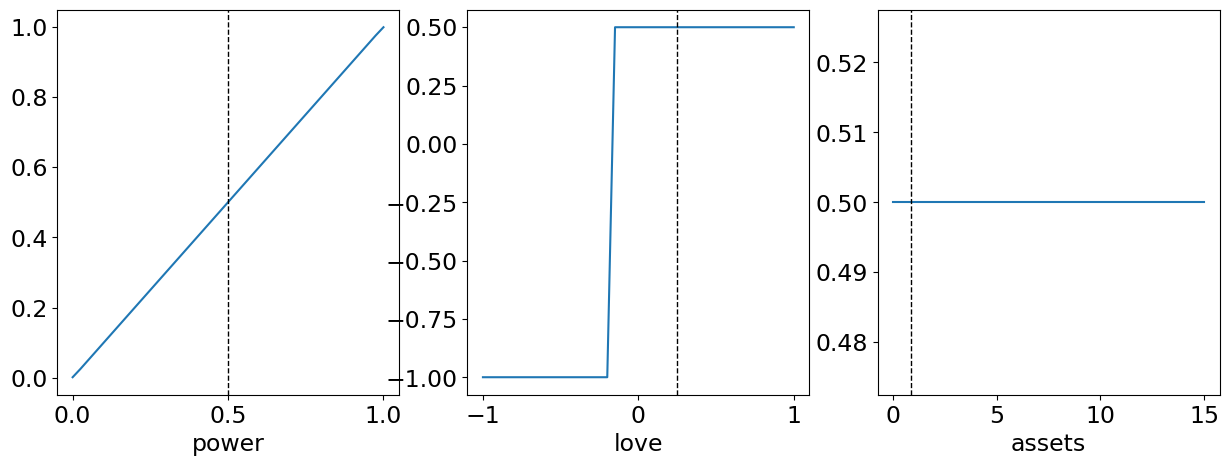

In [154]:
# 3 subplots
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax = ax.flatten()

# plot power over power, love and assets
ax[0].plot(m.par.grid_power,m.sol.power[t,:,iL,iA],label='power')
ax[0].set_xlabel('power')
ax[0].axvline(m.par.grid_power[iP],color='black',linestyle='--',linewidth=1)

ax[1].plot(m.par.grid_love,m.sol.power[t,iP,:,iA],label='love')
ax[1].set_xlabel('love')
ax[1].axvline(m.par.grid_love[iL],color='black',linestyle='--',linewidth=1)

ax[2].plot(m.par.grid_A,m.sol.power[t,iP,iL,:],label='assets')
ax[2].set_xlabel('assets')
ax[2].axvline(m.par.grid_A[iA],color='black',linestyle='--',linewidth=1)

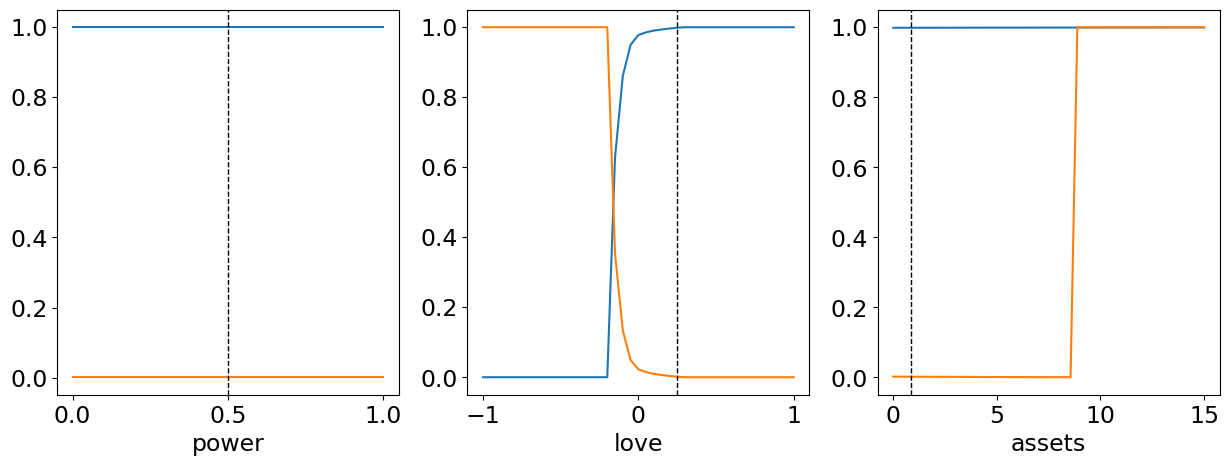

In [155]:
# 3 subplots
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax = ax.flatten()

# plot power over power, love and assets
ax[0].plot(m.par.grid_power,m.sol.power_at_zero_m[t,:,iL,iA],label='power')
ax[0].plot(m.par.grid_power,m.sol.power_at_zero_w[t,:,iL,iA],label='power')
ax[0].set_xlabel('power')
ax[0].axvline(m.par.grid_power[iP],color='black',linestyle='--',linewidth=1)

ax[1].plot(m.par.grid_love,m.sol.power_at_zero_m[t,iP,:,iA],label='love')
ax[1].plot(m.par.grid_love,m.sol.power_at_zero_w[t,iP,:,iA],label='love')
ax[1].set_xlabel('love')
ax[1].axvline(m.par.grid_love[iL],color='black',linestyle='--',linewidth=1)

ax[2].plot(m.par.grid_A,m.sol.power_at_zero_m[t,iP,iL,:],label='assets')
ax[2].plot(m.par.grid_A,m.sol.power_at_zero_w[t,iP,iL,:],label='assets')
ax[2].set_xlabel('assets')
ax[2].axvline(m.par.grid_A[iA],color='black',linestyle='--',linewidth=1)

# Simulated paths

In [129]:
models['model 1'].cpp.delink()
models['model 2'].cpp.delink()
models['model 2'].link_to_cpp(force_compile=True)
models['model 1'].link_to_cpp(force_compile=False)

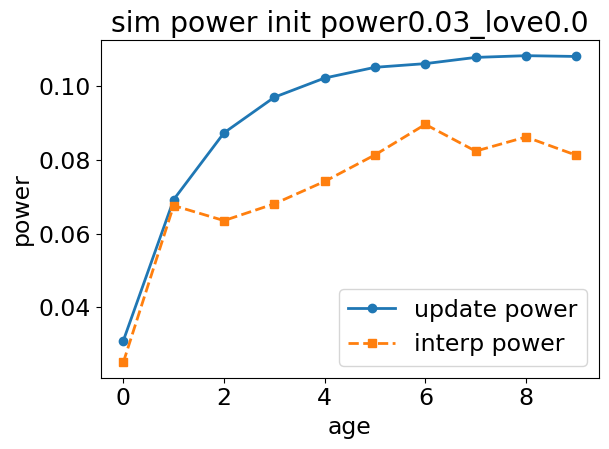

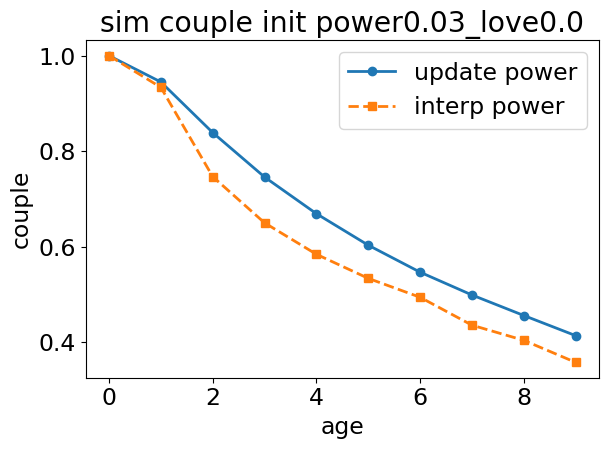

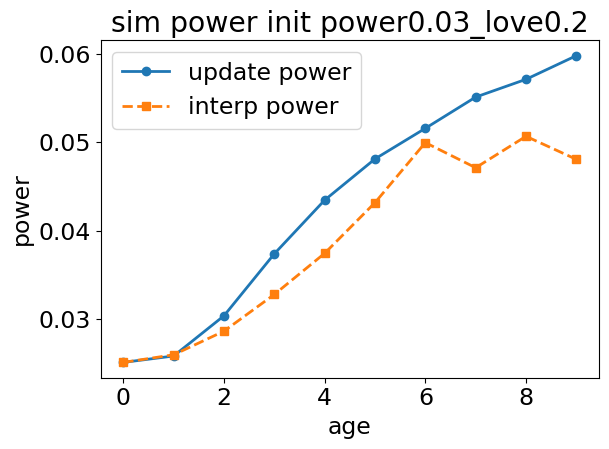

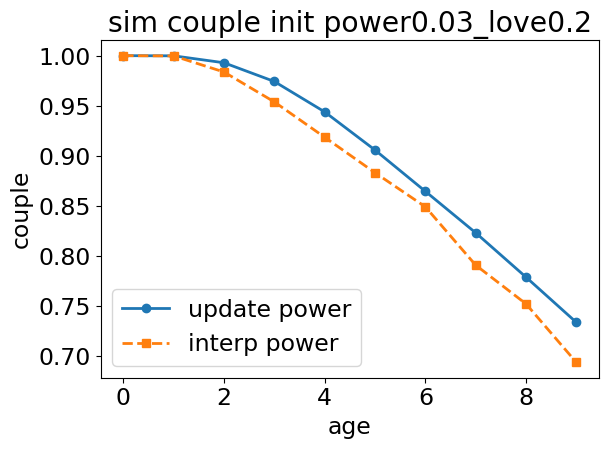

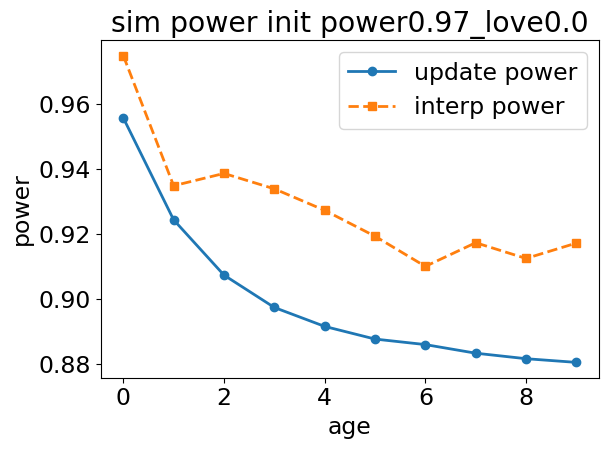

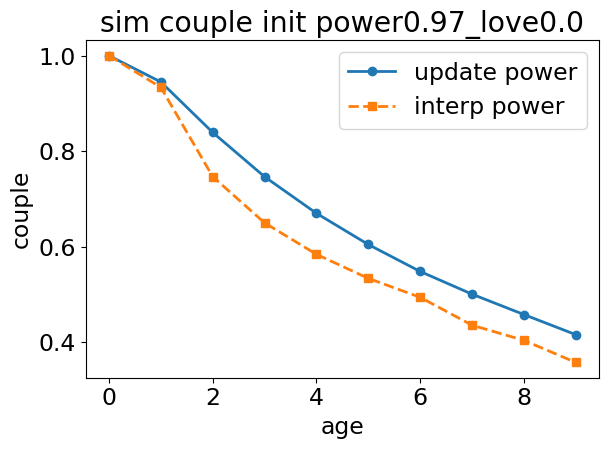

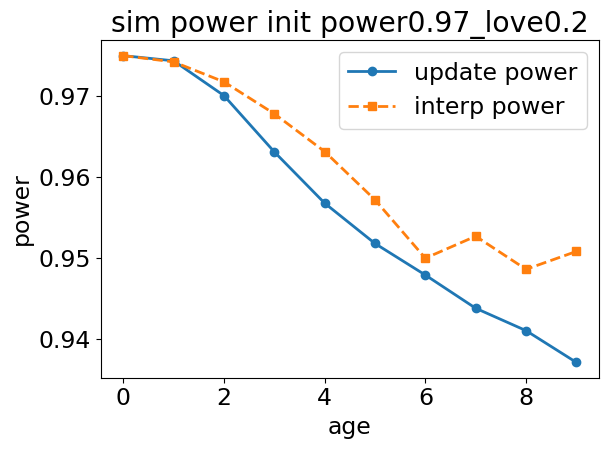

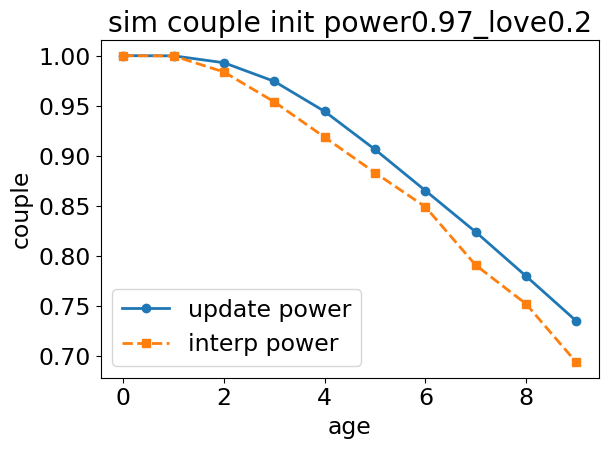

In [130]:
var_list = ('power','couple')
model_list = ('model 1','model 2')
SAVE = False
for init_power_idx in (1, 19):
    for init_love in (0.0, 0.2): 

            for i,name in enumerate(model_list):
                model = models[name]

                # reset sim
                for key, val in model.sim.__dict__.items():
                    if 'init' in key or key in 'draw_love, power_idx': continue
                    setattr(model.sim, key, np.zeros(val.shape)+np.nan)

                # show how starting of in a low bargaining power gradually improves
                model.sim.init_power_idx[:] = init_power_idx
                model.sim.init_love[:] = init_love 
                model.simulate()
                
            for var in var_list:

                fig, ax = plt.subplots()
                
                for i,name in enumerate(model_list):
                    model = models[name]

                    # pick out couples (if not the share of couples is plotted)
                    if var == 'couple':
                        nan = 0.0
                    else:
                        I = model.sim.couple<1
                        nan = np.zeros(I.shape)
                        nan[I] = np.nan

                    # pick relevant variable for couples
                    y = getattr(model.sim,var)        
                    y = np.nanmean(y + nan,axis=0)

                    ax.plot(y,marker=markers[i],linestyle=linestyles[i],linewidth=linewidth,label=model.spec['latexname']);
                    ax.set(xlabel='age',ylabel=f'{var}');

                plt.legend()

                fig_name = f'sim {var} init power{np.round(model.par.grid_power[init_power_idx],2)}_love{init_love}'
                plt.title(fig_name)
                plt.tight_layout()
                if SAVE: plt.savefig(path+fig_name+'.pdf')

### Differences in simulated behavior...

In [131]:
model1 = models['model 1']
par1 = model1.par
sol1 = model1.sol
sim1 = model1.sim

model2 = models['model 2']
par2 = model2.par
sol2 = model2.sol
sim2 = model2.sim

init_A = 0.
init_love = 0.02
init_power_idx = 4
init_power = par1.grid_power[init_power_idx]

model1.sim.init_A[:] = init_A
model1.sim.init_love[:] = init_love
model1.sim.init_power_idx[:] = init_power_idx
model1.simulate()

model2.sim.init_A[:] = init_A
model2.sim.init_love[:] = init_love
model2.sim.init_power_idx[:] = init_power_idx
model2.simulate()

Sw1 = sol1.Vw_remain_couple-sol1.Vw_single[:,np.newaxis, np.newaxis,:]
Sm1 = sol1.Vm_remain_couple-sol1.Vm_single[:,np.newaxis, np.newaxis,:]

Sw2 = sol2.Vw_remain_couple-sol2.Vw_single[:,np.newaxis, np.newaxis,:]
Sm2 = sol2.Vm_remain_couple-sol2.Vm_single[:,np.newaxis, np.newaxis,:]

In [132]:
# interpolate spousal surplus for sim1
simSw1 = np.zeros((par1.simN,par1.simT))
simSm1 = np.zeros((par1.simN,par1.simT))
for i in range(par1.simN):
    for t in range(par1.simT):
        A = sim1.A[i,t]
        love = sim1.love[i,t]
        power = sim1.power[i,t]
        simSw1[i,t] = linear_interp.interp_3d(par1.grid_power,par1.grid_love,par1.grid_A,Sw1[t], power, love, A)
        simSm1[i,t] = linear_interp.interp_3d(par1.grid_power,par1.grid_love,par1.grid_A,Sm1[t], power, love, A)

# interpolate spousal surplus for sim2
simSw2 = np.zeros((par2.simN,par2.simT))
simSm2 = np.zeros((par2.simN,par2.simT))
for i in range(par2.simN):
    for t in range(par2.simT):
        A = sim2.A[i,t]
        love = sim2.love[i,t]
        power = sim2.power[i,t]
        simSw2[i,t] = linear_interp.interp_3d(par2.grid_power,par2.grid_love,par2.grid_A,Sw2[t], power, love, A)
        simSm2[i,t] = linear_interp.interp_3d(par2.grid_power,par2.grid_love,par2.grid_A,Sm2[t], power, love, A)

In [133]:
A = sim1.A[0,0]
power = sim1.power[0,0]

sol_power = np.zeros(par1.num_love)
for iP in range(par1.num_love):
    love = par1.grid_love[iP]
    sol_power[iP] = linear_interp.interp_3d(par1.grid_power,par1.grid_love,par1.grid_A,sol1.power[1], power, love, A)

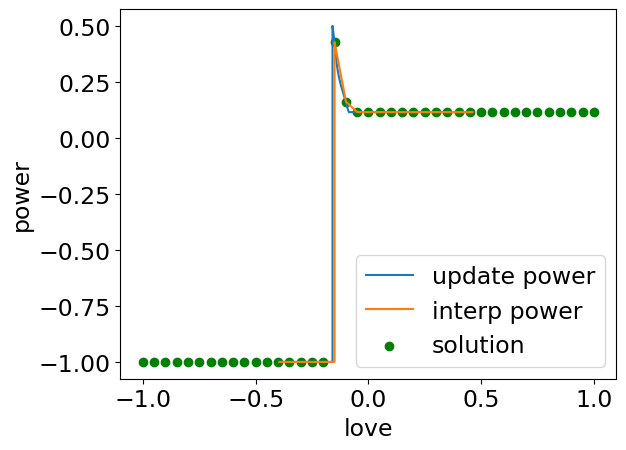

In [134]:
I1 = np.argsort(sim1.love[:,1])
I2 = np.argsort(sim2.love[:,1])

plt.plot(sim1.love[I1,1], sim1.power[I1,1], label='update power')
plt.plot(sim2.love[I2,1], sim2.power[I2,1], label='interp power')
plt.scatter(par1.grid_love, sol_power, color='green', label='solution')

# label axes
plt.xlabel('love')
plt.ylabel('power')
plt.legend();

(-0.2, -0.05)

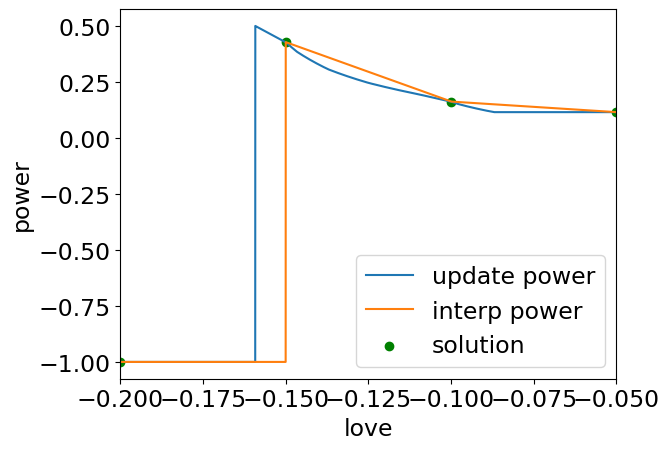

In [135]:
I1 = np.argsort(sim1.love[:,1])
I2 = np.argsort(sim2.love[:,1])


plt.plot(sim1.love[I1,1], sim1.power[I1,1], label='update power')
plt.plot(sim2.love[I2,1], sim2.power[I2,1], label='interp power')
plt.scatter(par1.grid_love, sol_power, color='green', label='solution')

# label axes
plt.xlabel('love')
plt.ylabel('power')
plt.legend()

# limit x axis
plt.xlim([-0.2,-0.05])

### Time

In [128]:
%timeit models['model 1'].simulate()
%timeit models['model 2'].simulate()

20.8 ms ± 1.55 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
14.7 ms ± 734 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
